
# New OANDA API

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from datetime import datetime
from PIL import Image
import matplotlib.image as mpimg

import sys
sys.path.append("../")
from trading.api.oanda_api import OandaApi

In [9]:
def get_data(instrument):
     
    api = OandaApi("../../config/oanda.cfg")
    dataframe = api.get_price_candles(instrument, 5)
    dataframe["Close"] = dataframe[instrument]
#     dataframe['time'] = dataframe['time'].apply(mpl_dates.date2num)
    return dataframe

def calculate_macd(df, fast_period=100, slow_period=200, signal_period=81):
    df['EMA_fast'] = df['Close'].ewm(span=fast_period, min_periods=fast_period).mean()
    df['EMA_slow'] = df['Close'].ewm(span=slow_period, min_periods=slow_period).mean()
    df['MACD'] = df['EMA_fast'] - df['EMA_slow']
    df['Signal_line'] = df['MACD'].ewm(span=signal_period, min_periods=signal_period).mean()
    return df

def generate_signals(df):
    signals = []
    df ["Buy"] = np.NAN
    df ["Sell"] = np.NAN
    position = 0  # 0 for no position, 1 for long, -1 for short
    for i in range(1, len(df)):
        if df['MACD'].iloc[i] > df['Signal_line'].iloc[i] and df['MACD'].iloc[i - 1] <= df['Signal_line'].iloc[i - 1]:
            df["Buy"].iloc[i] = df["Close"].iloc[i]
#             position = 1
        elif df['MACD'].iloc[i] < df['Signal_line'].iloc[i] and df['MACD'].iloc[i - 1] >= df['Signal_line'].iloc[i - 1]:
            df["Sell"].iloc[i] = df["Close"].iloc[i]
#             position = -1
#         else:
#             signals.append('')
#     signals.append('')  # Append an empty signal for the last candle
#     df['Signal'] = signals
    return df

# Example usage
# Assuming you have historical Forex candle data in a DataFrame called 'df'
# Make sure 'df' has columns like 'Date', 'Open', 'High', 'Low', 'Close', etc.



In [3]:
symbol = "EUR_GBP"
df = get_data(symbol)


In [10]:
# Calculate MACD
df = calculate_macd(df)

In [11]:
# Generate signals
df = generate_signals(df)

In [12]:
# Print the DataFrame with MACD and signals
# df.drop(columns=[symbol, "bid", "ask"], inplace=True)
print(df)

                     EUR_GBP      bid      ask    Close  EMA_fast  EMA_slow  \
time                                                                          
2024-02-05 00:16:30  0.85403  0.85395  0.85411  0.85403       NaN       NaN   
2024-02-05 00:17:00  0.85403  0.85395  0.85411  0.85403       NaN       NaN   
2024-02-05 00:17:30  0.85408  0.85400  0.85416  0.85408       NaN       NaN   
2024-02-05 00:18:00  0.85403  0.85395  0.85411  0.85403       NaN       NaN   
2024-02-05 00:18:30  0.85406  0.85399  0.85414  0.85406       NaN       NaN   
...                      ...      ...      ...      ...       ...       ...   
2024-03-26 00:14:30  0.85768  0.85761  0.85776  0.85768  0.857616  0.857594   
2024-03-26 00:15:00  0.85768  0.85761  0.85776  0.85768  0.857617  0.857595   
2024-03-26 00:15:30  0.85766  0.85759  0.85774  0.85766  0.857618  0.857595   
2024-03-26 00:16:00  0.85770  0.85763  0.85777  0.85770  0.857620  0.857596   
2024-03-26 00:16:30  0.85770  0.85763  0.85777  0.85

In [13]:
df.to_excel(f"../../data/backtest_macd_{symbol}.xlsx")

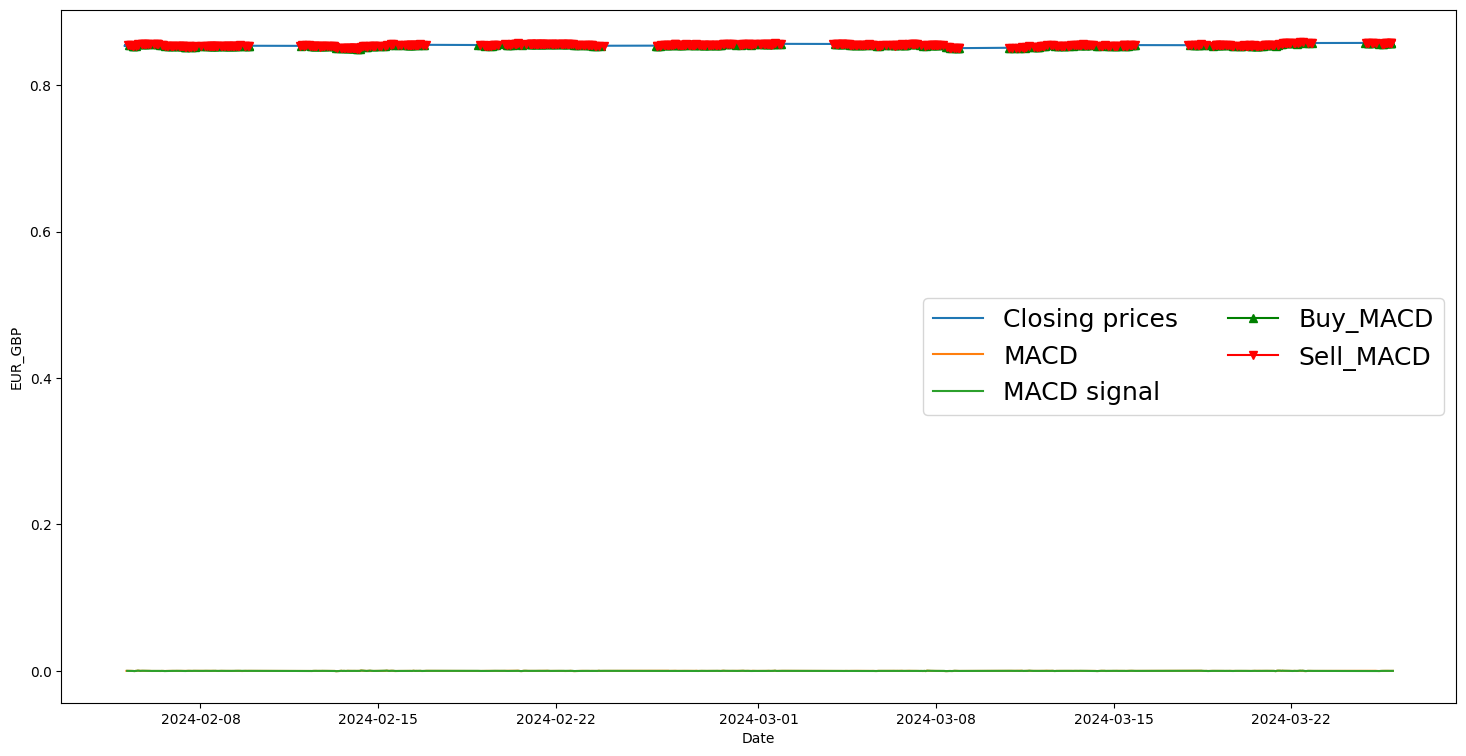

In [14]:
plt.figure(figsize = (18,9))

plt.plot(df["Close"], label = "Closing prices")
plt.plot(df["MACD"], label = "MACD")
plt.plot(df["Signal_line"], label = "MACD signal")
plt.plot(df["Buy"], marker = "^", color = "green", label = "Buy_MACD")
plt.plot(df["Sell"], marker = "v", color = "red", label = "Sell_MACD")


plt.xlabel("Date")
plt.ylabel(symbol)
plt.legend(fontsize=18, ncols = 2)
# plt.savefig('MACD.png', format='png')
plt.show()